In [162]:
# Task 1 May - 23 
# Richard Saavedra

In [103]:
import pandas as pd
import numpy as np

In [93]:
import pickle

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [ ]:
df=pd.read_parquet('./data/yellow_tripdata_2022-01.parquet')

In [140]:
# Q1 
print(df.shape)
df.tpep_pickup_datetime=pd.to_datetime(df.tpep_pickup_datetime)
df.tpep_dropoff_datetime=pd.to_datetime(df.tpep_dropoff_datetime)

df['duration']= df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply( lambda td: td.total_seconds() / 60)
# Q2  "Duration Column"
print(df.std())

(2463931, 19)
VendorID                                   0.502137
tpep_pickup_datetime     14 days 07:12:05.644016136
tpep_dropoff_datetime    14 days 07:11:17.325123812
passenger_count                            0.982969
trip_distance                            547.871404
RatecodeID                                 5.917573
PULocationID                              65.468057
DOLocationID                              70.790159
payment_type                               0.500178
fare_amount                              255.814887
extra                                      1.236226
mta_tax                                    0.082916
tip_amount                                 2.830698
tolls_amount                               1.680538
improvement_surcharge                      0.043747
total_amount                             255.964089
congestion_surcharge                       0.743204
airport_fee                                0.312555
duration                                  46.44530

/tmp/ipykernel_3125/3693721391.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.std())


## Q1: Number of columns = 19
## Q2: Standard Desviation of the trips duraiton = 46.44

In [145]:
df.duration.describe(percentiles=[0.90, 0.92,0.95, 0.98])

count    2.463931e+06
mean     1.421220e+01
std      4.644531e+01
min     -3.442400e+03
50%      1.018333e+01
90%      2.463333e+01
92%      2.691667e+01
95%      3.193333e+01
98%      4.215000e+01
max      8.513183e+03
Name: duration, dtype: float64

In [146]:
((df.duration >= 1) & (df.duration <= 60)).mean()

0.9827547930522406

## Q3: fraction of the records left after you dropped the outliers = 0.98

In [147]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

In [148]:
categorical = ['PULocationID','DOLocationID']
df[categorical] = df[categorical].astype(str)

In [149]:
df.shape

(2421440, 20)

In [150]:
train_dicts = df[categorical + numerical].to_dict(orient='records')
train_dicts

[{'PULocationID': '142', 'DOLocationID': '236', 'trip_distance': 3.8},
 {'PULocationID': '236', 'DOLocationID': '42', 'trip_distance': 2.1},
 {'PULocationID': '166', 'DOLocationID': '166', 'trip_distance': 0.97},
 {'PULocationID': '114', 'DOLocationID': '68', 'trip_distance': 1.09},
 {'PULocationID': '68', 'DOLocationID': '163', 'trip_distance': 4.3},
 {'PULocationID': '138', 'DOLocationID': '161', 'trip_distance': 10.3},
 {'PULocationID': '233', 'DOLocationID': '87', 'trip_distance': 5.07},
 {'PULocationID': '238', 'DOLocationID': '152', 'trip_distance': 2.02},
 {'PULocationID': '166', 'DOLocationID': '236', 'trip_distance': 2.71},
 {'PULocationID': '236', 'DOLocationID': '141', 'trip_distance': 0.78},
 {'PULocationID': '141', 'DOLocationID': '229', 'trip_distance': 1.91},
 {'PULocationID': '114', 'DOLocationID': '90', 'trip_distance': 0.82},
 {'PULocationID': '234', 'DOLocationID': '113', 'trip_distance': 0.73},
 {'PULocationID': '246', 'DOLocationID': '79', 'trip_distance': 2.16},
 

In [152]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

target = 'duration'
y_train = df[target].values
X_train.shape

(2421440, 516)

## Q4: Dimensionality of the matrix 515 

In [156]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

6.986335015622065

## Q5: RMSE Train 6.98

In [153]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
        df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

### Load data

In [158]:
df_val = read_dataframe('./data/yellow_tripdata_2022-02.parquet')

In [159]:
categorical = ['PULocationID', 'DOLocationID']
val_dicts = df_val[categorical].to_dict(orient='records')

X_val = dv.transform(val_dicts)

target = 'duration'
y_val = df_val[target].values

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)



7.78626863816595

## Q6: RMSE validation 7.78

#### Shape of df_train, df_val

In [155]:
print(len(df_train), len(df_val))
print(df_train.shape, df_val.shape)

2421440 2918187
(2421440, 20) (2918187, 20)


* df_train has 2.421.444 registros and 21 rows
* df_val has 2.918.1187 registros and 21 rows

## Anotations

/home/azureuser/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/azureuser/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


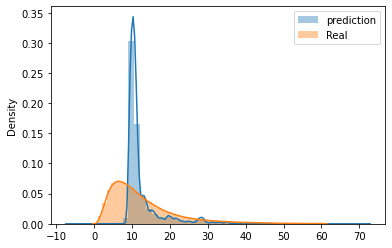

In [160]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='Real')
plt.legend()

In [161]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)